<a href="https://colab.research.google.com/github/pranjali-sharma/CLA/blob/master/COMS3251_Lab4_Dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMS 3251 CLA Lab 4: Population Dynamics and Principal Component Analysis

---

Pranjali Sharma, ps3072

Warning: You need numpy, matplotlib, mpl_toolkits, plotly, and **keras** to run this notebook. We strongly recommend using colab.

# Population Dynamics

The background behind this problem is described in Section 9.2 of BV. We are interested in US population dynamics based on the 2010 census data. We have death and birth rates for subpopulations of each age group from 0 to 100. (Birth rates are per person, so they are half the true rates for women only.) These rates are plotted vs age in Figures 9.2 and 9.3 of the text.

We also have a population vector from the census (millions of people per age) for the year 2010. 

In [0]:
### RUN THIS FIRST TO SET UP CENSUS DATA ###
### DO NOT MODIFY ###

import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# Death rate for each age group
deathRate = np.array([6.2300e-03, 4.4000e-04, 2.7000e-04, 2.0000e-04, 1.6000e-04,
                      1.2000e-04, 1.1000e-04, 1.1000e-04, 1.2000e-04, 1.1000e-04,
                      1.0000e-04, 1.3000e-04, 1.3000e-04, 1.5000e-04, 2.0000e-04,
                      2.5000e-04, 3.7000e-04, 4.7000e-04, 6.4000e-04, 7.1000e-04,
                      7.6000e-04, 8.7000e-04, 8.7000e-04, 8.8000e-04, 9.4000e-04,
                      9.2000e-04, 9.5000e-04, 9.3000e-04, 9.9000e-04, 1.0100e-03,
                      1.0300e-03, 1.0900e-03, 1.1000e-03, 1.1400e-03, 1.1500e-03,
                      1.2000e-03, 1.3100e-03, 1.3700e-03, 1.4600e-03, 1.5600e-03,
                      1.6200e-03, 1.8500e-03, 2.0100e-03, 2.1600e-03, 2.4300e-03,
                      2.5800e-03, 2.9800e-03, 3.2500e-03, 3.5100e-03, 3.8700e-03,
                      4.1300e-03, 4.5400e-03, 4.9400e-03, 5.3300e-03, 5.7100e-03,
                      6.0200e-03, 6.7000e-03, 7.1000e-03, 7.6900e-03, 8.2800e-03,
                      8.6000e-03, 9.3200e-03, 9.9800e-03, 1.1010e-02, 1.2500e-02,
                      1.2820e-02, 1.4040e-02, 1.5150e-02, 1.6870e-02, 1.8300e-02,
                      1.9670e-02, 2.1330e-02, 2.3470e-02, 2.5620e-02, 2.8000e-02,
                      3.0830e-02, 3.4410e-02, 3.7110e-02, 4.1260e-02, 4.4480e-02,
                      4.9640e-02, 5.5390e-02, 6.1490e-02, 6.8030e-02, 7.6730e-02,
                      8.5610e-02, 9.5400e-02, 1.0636e-01, 1.1802e-01, 1.3385e-01,
                      1.5250e-01, 1.6491e-01, 1.8738e-01, 2.0757e-01, 2.2688e-01,
                      2.5196e-01, 2.7422e-01, 2.9239e-01, 3.2560e-01, 3.4157e-01])

# Birth rate for each age group
birthRate = np.array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.0002 , 0.0002 , 0.0002 , 0.0002 ,
                      0.0002 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.045  ,
                      0.045  , 0.045  , 0.045  , 0.045  , 0.05415, 0.05415, 0.05415,
                      0.05415, 0.05415, 0.04825, 0.04825, 0.04825, 0.04825, 0.04825,
                      0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0051 , 0.0051 ,
                      0.0051 , 0.0051 , 0.0051 , 0.00035, 0.00035, 0.00035, 0.00035,
                      0.00035, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
                      0.     , 0.     ])

# US population in 2010 (millions)
pop2010 = np.array([3.94415, 3.97807, 4.09693, 4.11904, 4.06317, 4.05686, 4.06638,
                    4.03058, 4.04649, 4.14835, 4.17254, 4.11442, 4.10624, 4.11801,
                    4.16598, 4.24282, 4.31614, 4.39529, 4.50085, 4.58523, 4.51913,
                    4.35429, 4.26464, 4.19857, 4.24936, 4.26235, 4.15231, 4.24887,
                    4.21525, 4.22308, 4.28567, 3.97022, 3.98685, 3.88015, 3.83922,
                    3.95643, 3.80209, 3.93445, 4.12188, 4.3648 , 4.38327, 4.11498,
                    4.0761 , 4.10511, 4.2115 , 4.50887, 4.51976, 4.53526, 4.5388 ,
                    4.6059 , 4.66029, 4.46463, 4.50085, 4.38035, 4.292  , 4.25471,
                    4.03751, 3.93639, 3.79493, 3.64127, 3.62113, 3.4926 , 3.56318,
                    3.48388, 2.65713, 2.68076, 2.63914, 2.64936, 2.32367, 2.14232,
                    2.04312, 1.94932, 1.86427, 1.73696, 1.68449, 1.62008, 1.47107,
                    1.45533, 1.40012, 1.37119, 1.30851, 1.21287, 1.16142, 1.07481,
                    0.98572, 0.91472, 0.81421, 0.71291, 0.64062, 0.538  , 0.43556,
                    0.34499, 0.28139, 0.21698, 0.16944, 0.12972, 0.09522, 0.06814,
                    0.0459 , 0.03227])

# Set up the dynamics matrix as described below
diagDeath = np.diag(1-deathRate[0:len(deathRate)-1])
zerosDeath = np.vstack(np.zeros(len(diagDeath)))
A = np.block([[birthRate],[diagDeath,zerosDeath]])

The birth and death rate vectors can be used to define the dynamics matrix, as shown in the last three lines of the code block above. Here is what it looks like:

$$ A = \begin{bmatrix} b_1 & b_2 & b_3 & \cdots & b_{98} & b_{99} & b_{100} \\
1-d_1 & 0 & 0 & \cdots & 0 & 0 & 0 \\ 0 & 1-d_2 & 0 & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\ 
0 & 0 & 0 & \cdots & 1-d_{98} & 0 & 0 \\ 0 & 0 & 0 & \cdots & 0 & 1-d_{99} & 0 \end{bmatrix} $$

You can think of this as a generalization of the simple life stage matrix we covered in class. All birth rates appear in the first row, since they indicate number of newborns per age group. Additive inverses of death rates appear one term off the diagonal, since they indicate the proportion of people advancing to the next year.

## Problem 1a (10 points)

Let's start with the population in the year 2010, defined as `pop2010` in the code above, which will serve as the initial state vector $X_0$. Find the population vector in 2060 (50 years later) as $X_{50} = A^{50} X_0$ . Plot the population vectors $X_0$ and $X_{50}$ on the same plot. 

Briefly describe some of your observations in the change in population. How do the populations of different age groups change? Is there an increase or decrease in overall population?

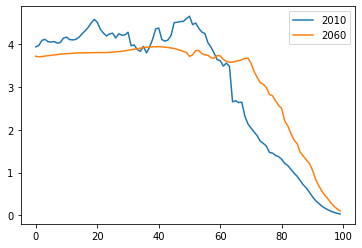

In [0]:
# YOUR CODE FOR 1A GOES HERE
# THE PLOT MUST INCLUDE A LEGEND

x_0= np.array(pop2010)
A_50=npl.matrix_power(A,50)
x_50= A_50@x_0 #this line is throwing an error


plt.plot(x_0, label='2010')
plt.plot(x_50, label='2060')
plt.legend()
plt.show()


**DESCRIBE YOUR OBSERVATIONS HERE**
A decrease in population can be observed in 0 to 60 age categories. The population over 60 is however greater in 2060 than in 2010. 

## Problem 1b (15 points)

Now let's look at the eigenvalues and eigenvectors of $A$. Compute them using the [eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) command.

Plot the magnitudes of all eigenvalues (you can plot the absolute values $|\lambda_i|$, since most of them will be complex). Then plot them all raised to the 50th power ($|\lambda_i^{50}|$) on the same plot, and think about what you're seeing.



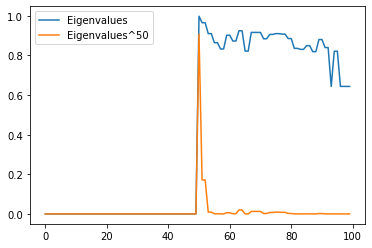

In [0]:
# YOUR 1B CODE GOES HERE
# THE PLOT MUST INCLUDE A LEGEND
w, v = npl.eig(A)
w_abs= np.abs(w)
w_50= np.power(w_abs, 50)

plt.plot(w_abs, label='Eigenvalues')
plt.plot(w_50, label='Eigenvalues^50')
plt.legend()
plt.show()



You should see that there is a single dominant eigenvalue $\lambda_i$, even though it is less than 1. (The index $i$ here may not be 0. You can use [argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) to find the corresponding index.) For large $k$, the population state vector will eventually converge to

$$X_k = A^k X_0 \approx c_i \lambda_i^k v_i,$$ 

where $v_i$ is the corresponding eigenvector and $c_i$ is the component of $X_0$ along $v_i$. Suppose that $X_0 = 20 v_1$. Find $X_{50}$ in two ways:
*   $X_{50} = A^{50} X_0$
*   $X_{50} = c_i \lambda_i^{50} v_i$

Plot the two resultant vectors (remember to take magnitudes of the vector entries first) on the same plot. You should see that they are nearly identical.



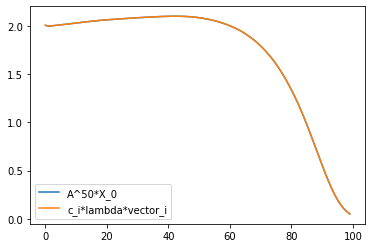

In [0]:
# YOUR 1B CODE GOES HERE
# THE PLOT MUST INCLUDE A LEGEND
i=np.argmax(w_abs)
w_i=w_abs[i]
w_i_50= np.power(w_i, 50)
v_i=v[:,i]
A_50=npl.matrix_power(A, 50)
X_0=20*v_i
X_50_a= np.abs(A_50@X_0)
X_50_b= np.abs(20* w_i_50 * v_i)


plt.plot(X_50_a, label='A^50*X_0')
plt.plot(X_50_b, label='c_i*lambda*vector_i')
plt.legend()
plt.show()



## Problem 1c (10 points)

What if $X_0$ is not an eigenvector, such as the actual population in 2010 (`pop2010`)? Unfortunately, $A$ is not diagonalizable, so it is not possible to represent `pop2010` in eigenvector coordinates (the matrix $P$ is not invertible!).

One reason is that $A$ is too "clean"---there is no noise in the model, which leads to multiple eigenvalues exactly equal to 0. If those eigenvalues were different small values close to 0, then we can get more linearly independent eigenvectors without significantly changing the true dynamics. 

Create a new dynamics matrix $B = A+\epsilon$, where $\epsilon$ is a matrix representing artificial noise. You can create a random matrix using [rand](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.rand.html). Be sure to scale the output of rand so that $\epsilon$ is much smaller than the values of $A$. You decide the scaling factor to use. 

Then find and plot the eigenvalues of $B$ as in the previous part. You should see that effectively all eigenvalues of $B$ are unique, in contrast to the eigenvalues of $A$. However, when raised to a sufficiently large power (say, 50), nearly all eigenvalues of $B$ decay to 0, except for the largest, whose value should be similar to that of $A$.

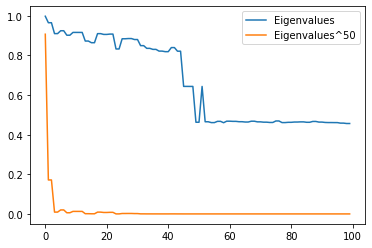

In [0]:
# YOUR 1C CODE GOES HERE
# THE PLOT MUST INCLUDE A LEGEND
dim= A.shape
E= np.random.rand(dim[0], dim[1])
E_scaled=E*0.000000000000000001
B=E_scaled+A

w, v = npl.eig(B)
w_abs= np.abs(w)
w_50= np.power(w_abs, 50)

plt.plot(w_abs, label='Eigenvalues')
plt.plot(w_50, label='Eigenvalues^50')
plt.legend()
plt.show()





## Problem 1d (15 points)

Now you have a diagonalizable dynamics matrix $B$ that is nearly identical to the original dynamics matrix $A$. Repeat what you did in part b, but start with $X_0=$ `pop2010` and use $B$ instead of $A$. First find $X_{50} = B^{50} X_0$.

Then find an approximation of $X_{50}$ using the dominant eigenvalue $\lambda_i$ and eigenvector $v_i$ of $B$:

$$ X_{50} \approx c_i \lambda_i^{50} v_i. $$

Recall that $c_i$ is extracted from $P^{-1} X_0$, where $P^{-1}$ is the vector of eigenvectors of $B$. The index $i$ corresponds to the index of the dominant eigenvalue, same as the indices of $\lambda_i$ and $v_i$.

Plot both of the predicted population vectors for the year 2060, and briefly describe your observations. Compare the two plots to each other, as well as to the prediction made using $A$ in part a.

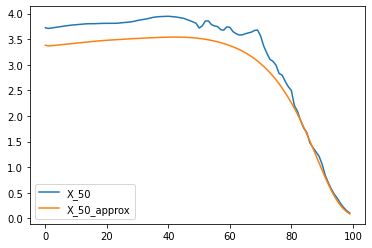

In [0]:
# YOUR 1D CODE GOES HERE
# THE PLOT MUST INCLUDE A LEGEND

B_50= npl.matrix_power(B, 50)
X_50= np.abs(B_50@x_0)

w,v = npl.eig(B)
w_abs= np.abs(w)
i=np.argmax(w_abs)
w_i=w_abs[i]
v_i=v[:, i]
w_i_50= np.power(w_i, 50)

P_inv= v_i
c_i= P_inv@x_0
X_50_approx= np.abs(c_i*w_i_50*v_i)

plt.plot(X_50, label='X_50')
plt.plot(X_50_approx, label='X_50_approx')
plt.legend()
plt.show()



**DESCRIBE YOUR OBSERVATIONS HERE**- While the 2 graphs are similar, they are not the same. This difference is beacuse of the noise we added and included in B.

To summarize what you did above, you took a non-diagonalizable matrix and made it diagonalizable by perturbing it slightly. One may do something similar to "increase" the rank of a matrix. There is no free lunch though---there must be a tradeoff that occurs when we perform such a conversion. What is a potential disadvantage of the approximation we computed above?

As a hint, are there worrying signs about $P^{-1}$ computed from $B$ (look at its entry magnitudes)?

**YOUR ANSWER HERE**- 
All of P_inv has negative entry magnitudes

# Principal Component Analysis

The full background for this problem is described in Chapter 7.5 of LLM (p. 429), and there is also a tutorial under Lecture 26 on Coureworks.

## Introduction

Principal Component Analysis (PCA) is a powerful tool for identifying patterns in a complex dataset. It is often one of the first tools you'll employ after basic distribution analysis when performing Exploratory Data Analysis (EDA).

One of the main tasks for PCA is *dimensionality reduction* - that is, if each of your data points is 1000-dimensional, it may be worth reducing it 10 dimensions before clustering, or even reducing it to 3 dimensions for plotting and visualization. We can see how it would be important to keep as much information about the initial distribution as possible, despite reducing the dimensionality.

PCA does this by identifying the **orthogonal basis vectors** that minimizes the correlation between individual dimensions. In English, we first find a single basis vector that best fits the distribution. Then, we continue finding orthogonal basis vectors that best fit the distribution until we run out of dimensions. The *dimensionality reduction* comes from the fact that, even if we project the entire dataset onto just a few of these basis vectors (hence, reducing the dimensionality of the data), we can maintain much of the characteristics of the distribution.

This figure from Wikipedia ([CC BY 4.0](https://commons.wikimedia.org/wiki/File:GaussianScatterPCA.svg)) is a good visualization of performing PCA on 2D data:
<img src=https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg width=400>

The arrow that points to the top right is the **first component**. Its **direction** is the single direction that best fits the distribution. Its **magnitude** quantifies just how good that fit is. You can imagine that if we project all of the points onto that line, we wouldn't lose that much information. If we kept just this vector, we would be *reducing the dimension* of the data from 2 to 1. 

The arrow that points to the top left is the **second component**. In this case, because the original data only has 2 dimensions, this component completes the orthogonal basis for the original data. Its **magnitude** indicates that it doesn't fit the data as well as our first component, and this makes sense. If we project all of the points onto this line, then we would lose a lot of information. We could perform dimensionality reduction onto this vector, but we probably don't want to.


## Problem Statement

We're going to perform PCA on MNIST, which is a dataset of 60,000 images of handwritten digits. Each image is 28x28, or 784 pixels. The original task for this dataset is to, given each image, identify which digit (0~9) is written. Before we do any machine learning though, we'd like to visualize the distribution of this dataset. It'd be useful to know beforehand which digits are similar to each other. We can intuitively tell that 4's and 9's may be similar, but it would be great if we could actually observe this.

A straightforward way to do this is to reduce the dimensionality from 784 to 3. Then, we can just plot the entire distribution in 3 dimensions.

## Banned Functions

We're going to do much of this from scratch, so there are banned functions:
```
sklearn.decomposition.PCA
sklearn.preprocessing.StandardScaler
# Any sklearn function really
```

We'll discuss explicitly allowed functions at each step, but feel free to ask on Piazza. If you feel like you're getting something for free, it's probably not allowed.

## Problem 2a (10 points)

**Preprocessing the data**

Colab notebooks come with a smaller MNIST dataset of 20k data points. If you're doing this locally, we've provided the csv file. We're also providing the import function for the CSV, which puts each data point as a row in a 2D numpy array.

**If you are using a local installation,** Download the .csv from here: http://jakehlee.com/cla-s2020/mnist_train_small.csv

Complete the required steps in the `preprocess_mnist()` code for preprocessing the data. These steps are:
1. Make each feature have a mean of 0.
2. Make each feature have a standard deviation of 1.

When you run the code block, you should see `2a passed.`, perhaps with a warning about dividing by zero. This does not guarantee your math was correct, only that your data is in the right structure.

In [0]:
### DO NOT MODIFY ###
%matplotlib notebook
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def import_mnist(filepath):
    """ Imports the mnist_train_small.csv data set

    Returns:
        A tuple of numpy arrays:
            [0] Pixel values of the mnist dataset flattened into a 1D vector
            [1] Labels corresponding to each image
    """
    with open(filepath, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        raw_data = np.array(list(reader)).astype(np.float)
    
    # first column are the labels, rest is the data
    y = raw_data[:,0]
    X = raw_data[:,1:]

    return X, y

### END DO NOT MODIFY ###

def preprocess_mnist(X):
    """ Standardizes the given data set.
    DO NOT USE any existing standardizer.

    Instructions:
    For each feature, make its mean be 0.
    For each column, subtract its mean from the entire column.
        THEN
    For each feature, make its standard deviation be 1.
    For each column, divide the entire column by its standard deviation.
        THEN
    Replace all NaNs due to dividing by zero with zero. np.nan_to_num()

    (Why is this okay? If the stddev is zero, then it means all of the values
    are the same. That means we have nothing to gain from this dimension, so
    we can just replace it all with zero with no consequence.)

    Returns:
        A numpy array of type np.float
    """

    ### YOUR 2a CODE GOES HERE ###
    # We implemented this function in 3 lines.
    X_demeaned= X.copy()
    col_mean= X.mean(axis=0, keepdims=True)
    X_demeaned= X-col_mean

    col_std= X.std(axis=0, keepdims=True)
    X_std= X_demeaned/col_std   

    X_std= np.nan_to_num(X_std)

    X=X_std
     
    return X
    

### DO NOT MODIFY IF USING COLAB ###
DATAPATH = "sample_data/mnist_train_small.csv"

### DO NOT MODIFY ###
def verify_2a(X, eps=1e-12):

    if X.shape != (20000, 784):
        raise ValueError("Wrong array shape: {}".format(X.shape))

    means = np.mean(X, axis=0)
    stds = np.around(np.std(X, axis=0), decimals=4)

    if np.any(np.absolute(means) > eps):
        raise ValueError("Nonzero mean found")
    
    if np.any(np.isin(stds, [0, 1]) == False):
        raise ValueError("Nonzero std found")
    
    print("2a passed.")
        

X, y = import_mnist(DATAPATH)
Xp = preprocess_mnist(X)
verify_2a(Xp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


2a passed.


## Problem 2b (20 points)

**Performing Dimensionality Reduction with PCA**

We can now perform PCA. Let's go through it step-by-step.

### 1. Calculate the Covariance Matrix

We first calculate the covariance matrix, defined as:
$$ S = X^T X / (n-1)$$
Where $n$ is the number of samples. Intuitively, each value in the covariance matrix is the covariance between the corresponding two dimensions, and the values on the diagonal are just the variances of that dimension. This matrix is always symmetric and positive semidefinite (non-negative eigenvalues).

### 2. Calculate its Eigenvalues and Eigenvectors

We then diagonalize the covariance matrix as follows:
$$ S = Q \Lambda Q^{-1} $$
Where columns of $Q$ are eigenvectors and $\Lambda$ are its corresponding eigenvalues.

We now take the 3 largest eigenvalues and its corresponding eigenvectors. Intuitively, these eigenvectors of the covariance matrix represent the directions in which the variance is maximized. These are the three basis vectors with which we'll perform dimensionality reduction. Call this new basis matrix $Q'$.

### 3. Project the Data into the New Basis

We can now project the data into the new 3-dimensional space with
$$ X' = XQ' $$

### But wait... ###

If you take a closer look at this process, you may find that this process can also be accomplished with Singular Value Decomposition. As you already know, SVD creates a decomposition $$ X = U \Sigma V^T $$ where $U$ is an orthogonal matrix, $\Sigma$ is a diagonal matrix containing singular values, and $V$ is another orthogonal matrix. Furthermore, we can derive from the definition of the covariance matrix:

$$
\begin{align}
    S &= X^T X / (n-1) && \text{Definition of covariance matrix}\\
    &= (U \Sigma V^T)^T(U \Sigma V^T) / (n-1) && \text{Substitution of SVD}\\
    &= VSU^TUSV^T / (n-1) && \text{Transpose expansion}\\
    &= V \frac{\Sigma}{n-1} V^T && \text{Definition of orthogonal matrix ($U^TU=I$)}\\
    &= V \frac{\Sigma}{n-1} V^{-1} && \text{Definition of orthogonal matrix ($V^T = V^{-1}$)}
\end{align}
$$

for which the last expression looks *very* similar to the diagonalization we did in step 2. 

This means that just finding the SVD of $X$ accomplishes steps 1 and 2 in one go. Let's redefine the steps:

### 1. Perform SVD

This gives us $$X = U \Sigma V^T$$

### 2. Construct the Basis Matrix

Take the 3 largest singular components in $S$ and their corresponding column vectors in $V$. **Note the transpose**. Stack these and form the new basis matrix $V'$.

### 3. Project the Data into the New Basis

We can now project the data into the new 3-dimensional space with
$$X' = XV'$$

This is actually what most PCA functions actually do under the hood. This method also avoids having to calculate $X^T X$ (see: Läuchli matrix).

Got it? Let's implement it. Edit `PCA()` to perform the steps above. When you run the code, you will see `2b passed.` if the output array is in the right dimensions.

In [0]:
def PCA(X):
    """ Performs dimensionality reduction to 3 dimensions with PCA.
    DO NOT use any existing PCA functions.
    You MUST implement PCA with SVD. 
    Calculating X^T X at any point will result in all points lost.

    Expect this function to take a few minutes to run.

    Returns:
        A numpy array of the dim-reduced data

    """

    ### YOUR 2b CODE GOES HERE ###
    # We implemented this function in 4 lines.


    ### Calculate the SVD of X here.
    # You should use np.linalg.svd(). Read the documentation carefully.
    u, s, vh = np.linalg.svd(X, full_matrices=True)

    ### Find V' here.
    # Read the svd() documentation carefully.
    # You may need to do less work than you might think.
    indeces=s.argsort()[-3:][::-1]
    v_dash= np.stack((vh[indeces[0]], vh[indeces[1]], vh[indeces[2]]), axis=1) #taking rows instead of columns becoz vh is transpose of v
   
    ### Project X onto V' here and return it.
    X_dash=X@ v_dash

    X=X_dash
    verify_2b(X_dash)
    return X


### DO NOT MODIFY ###

def verify_2b(X):
    if X.shape != (20000, 3):
        raise ValueError("Wrong shape output.")
    
    print("2b passed. This does not guarantee the correctness of your math.")

X_reduced = PCA(Xp)

2b passed. This does not guarantee the correctness of your math.


## Problem 2c (10 points)

**Plotting**

We're now going to plot this in 3D. We're providing a function that will split up the reduced data into data points for each digit. Complete the function to plot the provided 10 arrays with different colors and a legend.

Due to limitations in Google Colab, we're using plot.ly instead of matplotlib. Find the documentation and examples here:

https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html

https://plotly.com/python/3d-scatter-plots/

**There is a question below the code block**

In [0]:
### DO NOT MODIFY ###
def post(X, y):
    """ Given a dataset and its corresponding classes, return a dataframe 
    to be used for plotting.

    Returns:
    A pandas dataframe.
    """
    import pandas as pd
    output = np.concatenate((X, np.vstack(y).astype(str)), axis=1)
    df = pd.DataFrame(output, columns=['x', 'y', 'z', 'digit'])
    
    return df
### END ###

def PCA_plot(Xs):
    """ Given the output from split, plot it in 3D.
    You will need to use the 'x', 'y', 'z', and 'color' kwargs in px.scatter_3d()

    Returns:
    None.
    """
    import plotly.express as px

    ### YOUR 2c CODE GOES HERE ###
    # We implemented this function in 2 lines.
    
    fig= px.scatter_3d(Xs, x= 'x', y='y', z='z', color= 'digit')
    fig.show()


### DO NOT MODIFY ###
Xdf = post(X_reduced, y)
PCA_plot(Xdf)


**2c Observations**

Use the clusters visualized in the plot to make some observations. Based on looking at just the pixel values, which digits are similar to each other? Which digits are distinct and easy to separate?

YOUR ANSWER GOES HERE- 2 and 3 are very similar to each other. 7 and 0 are easy to separate.

## Problem 2d (10 points)

We just performed dimensionality reduction from 784 dimensions to 3 dimensions, and visualized the result. We should be able to see some clusters clearly, but everything still seems very entangled and hard to separate. This is because we are looking at the **raw pixel values**. You can imagine that a single pixel does not make much of a difference on which digit an image represents.

Let's instead look at a **different representation** of each image. We'll train a **neural network** to classify each of these images as 0~9, and then we'll *extract* the neuron activations from one of the layers. 

In English, the neural network is going to learn to decide what digit each image is. To do this learning, it's going to build an internal model of what each digit is supposed to look like. Then, for each image, we can extract a vector showing what the neural network thinks about it. By visualizing these vectors, we can see what the network is confused by, and what it's confident about. 

The good news is, **you won't have to write any code for this section**. This also means that we have a higher standard for the observations section later on.

### Training and extracting from the neural network

Run the following cell, which will train a small neural network on the MNIST dataset. Then, it will extract the neural network's interpretation of each image. Expect this to take a couple minutes, especially on a laptop. If you're on colab, go to `Runtime > Change Runtime Type > GPU` for some time save.

In [0]:
### DO NOT MODIFY ANYTHING IN THIS CELL ###
### IF YOU HAVE ISSUES WITH KERAS INSTALLATION, ASK ON PIAZZA ###
def train_and_extract(X, y):
    import keras
    from keras.models import Sequential, Model
    from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
    from keras import backend as K

    # y to one-hot
    y_categorical = keras.utils.to_categorical(y, 10)

    # X to 2D
    X2D = X.reshape((20000, 28, 28, 1))

    # model arch

    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', name='conv1', input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(10, activation='softmax', name='fc2'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy']
                  )

    model.fit(X2D, y_categorical,
              batch_size=128,
              epochs=5,
              verbose=1)

    extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)

    features = extractor.predict(X2D)
    return features

feats = train_and_extract(Xp, y)
print("extracted features shape:", feats.shape)


Using TensorFlow backend.


Epoch 1/5
20000/20000 [==============================] - 10s 516us/step - loss: 0.3285 - accuracy: 0.8994
Epoch 2/5
20000/20000 [==============================] - 10s 509us/step - loss: 0.0858 - accuracy: 0.9726
Epoch 3/5
20000/20000 [==============================] - 10s 514us/step - loss: 0.0530 - accuracy: 0.9837
Epoch 4/5
20000/20000 [==============================] - 10s 510us/step - loss: 0.0308 - accuracy: 0.9908
Epoch 5/5
20000/20000 [==============================] - 10s 507us/step - loss: 0.0222 - accuracy: 0.9927
extracted features shape: (20000, 128)


### Visualizing the features

As you can see above, we just extracted a 128-dimensional vector for each of our images from the neural network. Now we can use PCA and plot it using the functions we wrote in Problem 2b & 2c to see what it looks like.

In [0]:
### DO NOT MODIFY ANYTHING IN THIS CELL ###
### THIS SHOULD WORK WITH FUNCTIONS YOU PREVIOUSLY WROTE ###
feat_pre = preprocess_mnist(feats)
feats_reduced = PCA(feat_pre)
feats_df = post(feats_reduced, y)
PCA_plot(feats_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning:

invalid value encountered in true_divide



2b passed. This does not guarantee the correctness of your math.


**2d observations**

Compare this plot to the one generated in 2c. Do the clusters seem more or less entangled? Are the same digit clusters next to each other? Does it seem like the neural network succeeded in learning what each digit looks like? Write at least 100 words discussing the plot seen above.

YOUR OBSERVATIONS GO HERE-
The clusters in 2d look less entangled than the ones obtained in 2c. While it appears that the same digit clusters are next to each other in botht the graphs, the amount of overlapping clusters make it hard to tell for sure. Since the clusters are better separated than before, the neural network seems to have succeeded in learning what each digit looks like. 7 and 0 are still quite easy to differentiate. The overlap between 2 and 3 which was quite a bit in the previous part has decreased in this part. They are still next to each other but the overlap is considerably less. This shows that the neural network was successful.

# !!! Submission Instructions

Click `Runtime > Restart and run all...` before submitting. Move the 2c and 2d plots around so that the entire plot is visible.

**If you have issues with the text cutting off at the side of the PDF**, exit full screen and resize your window so that it only fills the left half of your screen. Then, click `File > print`. Remember to adjust your plots in 2c and 2d.